# Seperating stock to forcast for certain dates depending on the product

In [122]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [124]:
import sys
sys.path.append('../../src')

In [125]:
from data_config import ProductHandler as ph

In [126]:
ph.custom_prod_set()

All custom codes for existing products: 
{'32Z', '37S', '68Y', '293', '11Z', '548', 'L-D', '15Y', '584', 'IG-', '747', 'IM-', '88Z', '09R', 'ALP', 'BRO', '797', '239', '27P', '36Y', '085', '206', 'HCO', '089', '23S', 'RO-', '698', '741', 'TOG', '64V', '380', '43R', '691', '162', 'AP-', '55T', 'OY-', 'D36', '13V', '08U', 'PIT', '843', 'ALB', 'OR-', '135', '387', '959', '384', '94X', 'AGS', '8Z-', 'VA-', '153', 'SMC', 'OU-', '813', '-00', '002', '556', '90Y', 'JMP', 'UNC', 'E-P', '036', '57X', 'SHF', '555', '252', '503', 'FRS', 'RE-', '390', 'TA-', 'TMC', 'OV-', '097', '06V', '394', '358', '385', '50Y', '34S', '37U', '486', '36V', 'SQU', '103', '6-9', '846', 'PK-', '20U', '831', 'BBJ', '2-0', 'R-T', 'HEA', '340', '57T', '353', '750', '479', 'A-T', '44W', '389', '49X', '564', '6-2', '271', '33V', '57Y', '12Z', '043', '87Y', '351', 'H-0', 'RU-', '523', 'BAN', '712', '783', '605', '654', 'R-0', '29U', 'POS', '847', '72S', '748', '72Z', '007', 'SRF', '39W', '75Y', '092', '05U', '375', '552',

In [127]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [128]:
# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('FRE'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

FRE


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [129]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


C:\Users\44777\AppData\Local\Temp\ipykernel_3676\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_3676\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_3676\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_3676\1363007664.py:7: RuntimeWarning: Precision

Unusually high order quantities (per ProductNumber):
                     ProductNumber  OrderQuantity   z_score
ProductNumber                                              
FRE-005-0015Y 48     FRE-005-0015Y         475000  4.034252
              4685   FRE-005-0015Y         475000  4.034252
              9322   FRE-005-0015Y         475000  4.034252
              13959  FRE-005-0015Y         475000  4.034252
              18596  FRE-005-0015Y         475000  4.034252
...                            ...            ...       ...
FRE-005-0352Z 4278   FRE-005-0352Z         730000  3.181705
              8915   FRE-005-0352Z         730000  3.181705
              13552  FRE-005-0352Z         730000  3.181705
              18189  FRE-005-0352Z         730000  3.181705
              22826  FRE-005-0352Z         730000  3.181705

[165 rows x 3 columns]
Dropping: 
ProductNumber         165
order_year            165
order_month           165
order_week            165
order_weekday         165
is

C:\Users\44777\AppData\Local\Temp\ipykernel_3676\1363007664.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)


In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor

In [131]:
customer_total = custom_code_df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'


# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

total_X_preprocessed = preprocessor.fit_transform(total_X)

# Extract feature names from the fitted pipeline
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine categorical and numeric feature names
all_feature_names = list(encoded_cat_features) + numeric_features

# Convert preprocessed data back to DataFrame with correct feature names and index
total_X_preprocessed_df = pd.DataFrame(total_X_preprocessed, columns=all_feature_names, index=total_X.index)

total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X_preprocessed_df, total_y, test_size=0.2, random_state=42)

# Output the shape
print(f"Train Shape: {total_X_train.shape}, Validation Shape: {total_X_val.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()

Train Shape: (17996, 373), Validation Shape: (4499, 373)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [132]:
from model_utils import *

In [133]:
# Define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024']
target = 'OrderQuantity'

# Prepare data
X = custom_code_df[features]
y = custom_code_df[target]

# # Define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

# Extract feature names from the fitted pipeline
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine categorical and numeric feature names
all_feature_names = list(encoded_cat_features) + numeric_features

# Convert preprocessed data back to DataFrame with correct feature names and index
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names, index=X.index)

X_train, X_val, y_train, y_val = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

In [134]:
mlp_params = find_best_hyperparameters(MLPRegressor(), param_grids(MLPRegressor().__class__.__name__), X_train, y_train)

Model type: MLPRegressor
Fitting 5 folds for each of 3 candidates, totalling 15 fits
MLPRegressor Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': 256, 'learning_rate': 'adaptive', 'max_iter': 500, 'random_state': 42, 'solver': 'adam'}


d:\SCM---ML-Visualisation\tf_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [135]:
mlp_tuned = MLPRegressor(**mlp_params)

# Train the model
mlp_tuned.fit(X_train, y_train)

# Evaluate model using the imported function
train_metrics = evaluate_model(mlp_tuned, X_train, y_train)
test_metrics = evaluate_model(mlp_tuned, X_val, y_val)

Mean Absolute Error (MAE): 29249.4115
Mean Squared Error (MSE): 2257813854.8336
Root Mean Squared Error (RMSE): 47516.4588
R-squared (R²): 0.8712
Mean Absolute Error (MAE): 30060.6875
Mean Squared Error (MSE): 2421192786.6540
Root Mean Squared Error (RMSE): 49205.6174
R-squared (R²): 0.8696


d:\SCM---ML-Visualisation\tf_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [136]:
test_metrics

{'MAE': 30060.687489645414,
 'MSE': 2421192786.654021,
 'RMSE': np.float64(49205.61742986283),
 'R²': 0.8696271238121338}

In [137]:
train_metrics

{'MAE': 29249.41146172319,
 'MSE': 2257813854.833568,
 'RMSE': np.float64(47516.458778338776),
 'R²': 0.8711848991217537}

In [138]:
mlp_tuned.fit(total_X_train, total_y_train)

# Evaluate model using the imported function
total_train_metrics = evaluate_model(mlp_tuned, total_X_train, total_y_train)
total_test_metrics = evaluate_model(mlp_tuned, total_X_val, total_y_val)

Mean Absolute Error (MAE): 29249.4115
Mean Squared Error (MSE): 2257813854.8336
Root Mean Squared Error (RMSE): 47516.4588
R-squared (R²): 0.8712
Mean Absolute Error (MAE): 30060.6875
Mean Squared Error (MSE): 2421192786.6540
Root Mean Squared Error (RMSE): 49205.6174
R-squared (R²): 0.8696


d:\SCM---ML-Visualisation\tf_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [139]:
# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
custom_code_df['DetailedOrderDate'] = pd.to_datetime(
    custom_code_df['order_year'].astype(str) +
    custom_code_df['order_week'].astype(str).str.zfill(2) +
    custom_code_df['order_weekday'].astype(str),
    format='%Y%W%w'
)

In [140]:
# Get model predictions
y_train_pred = mlp_tuned.predict(X_train)
y_val_pred = mlp_tuned.predict(X_val)

# Use the 'total' for predictions for better idea on dashboards
total_y_train_pred = mlp_tuned.predict(total_X_train)
total_y_val_pred = mlp_tuned.predict(total_X_val)


In [141]:
# # statements to check the data of both y_val and y_val_pred
# print(y_val)
# print(y_val_pred)

In [142]:
y_val = pd.Series(y_val)

In [143]:
# Convert order year and month to datetime format
custom_code_df['OrderDate'] = pd.to_datetime(custom_code_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
custom_code_df = custom_code_df.sort_values(by='OrderDate')

In [144]:
# print(X_val.type)

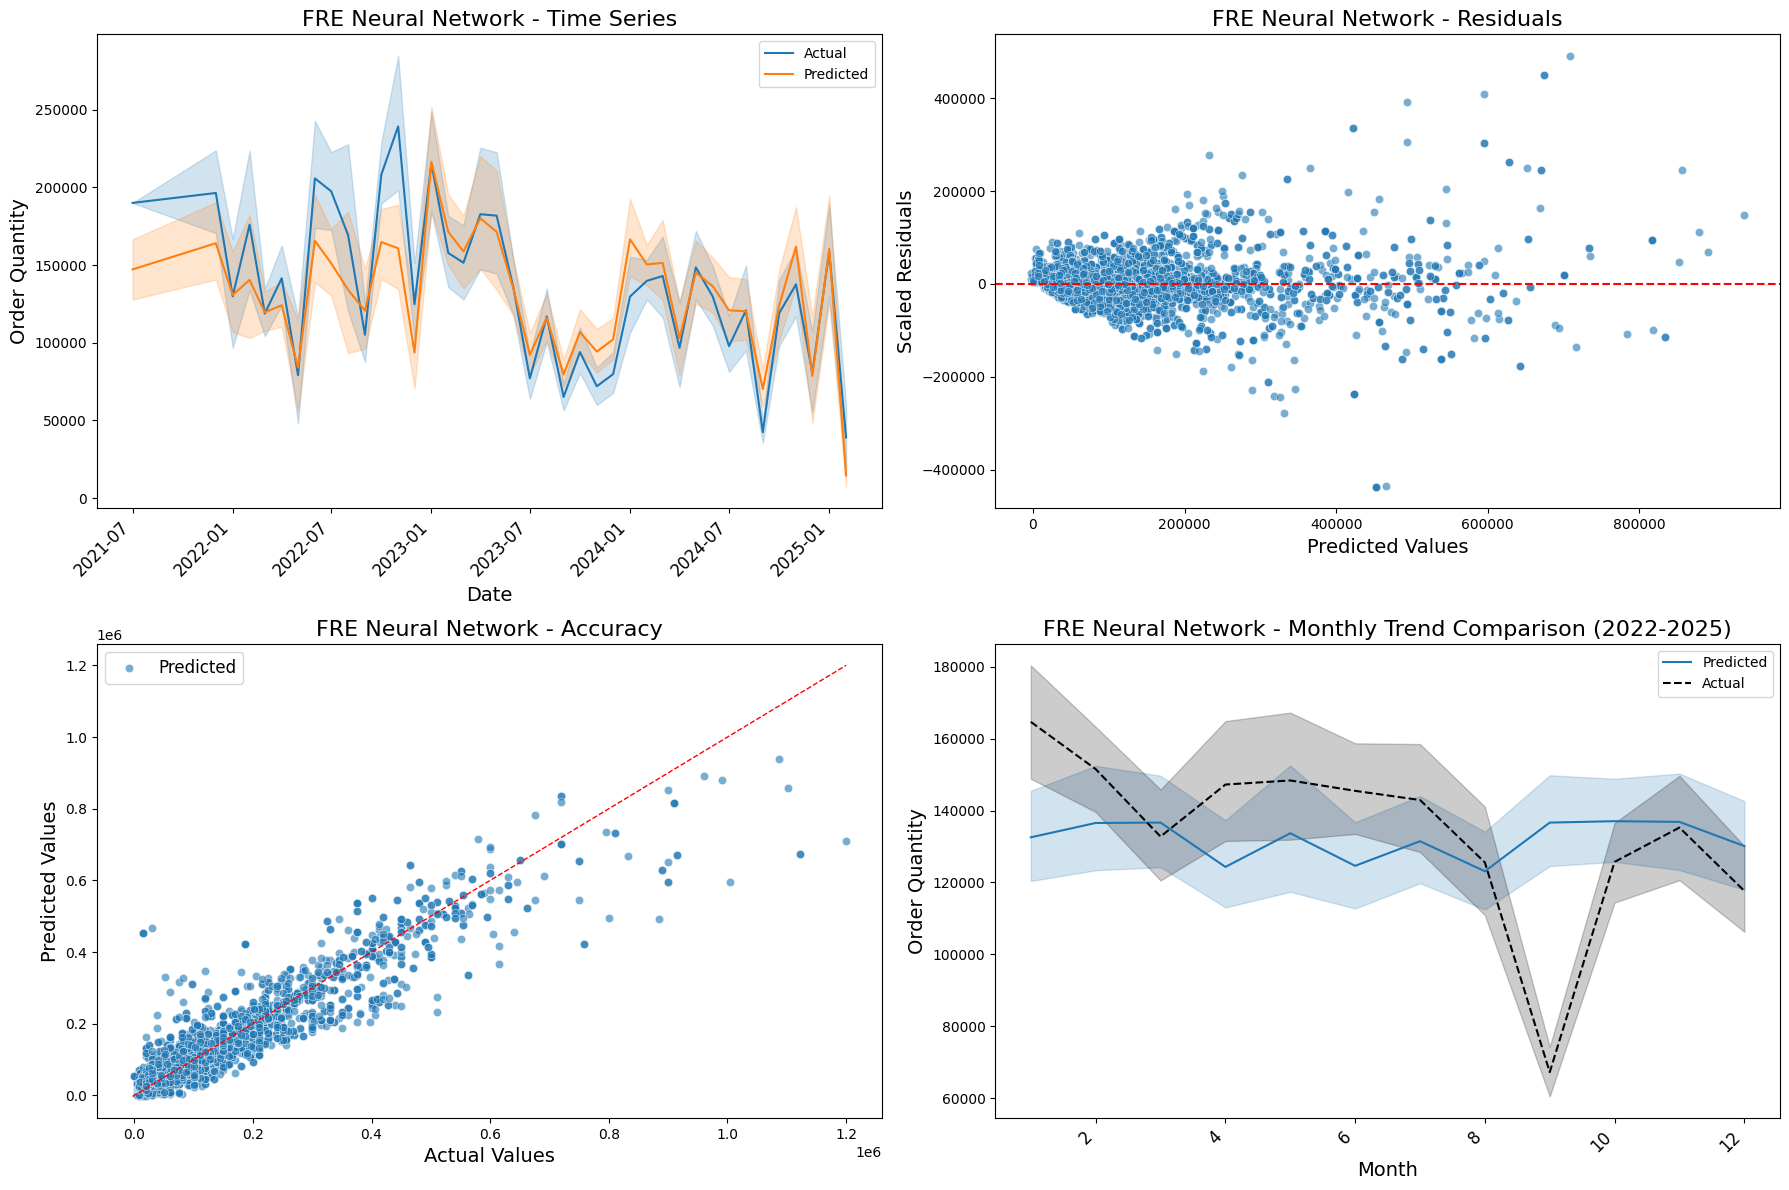

In [145]:
# Create subplots (2 rows, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12)) 
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Time Series Comparison
sns.lineplot(x=custom_code_df.loc[y_val.index, 'OrderDate'], y=y_val, label='Actual', ax=axes[0, 0])
sns.lineplot(x=custom_code_df.loc[y_val.index, 'OrderDate'], y=y_val_pred, label='Predicted', ax=axes[0, 0])
axes[0, 0].set_title(f'{custom_ref} Neural Network - Time Series', fontsize=16)
axes[0, 0].set_xlabel('Date', fontsize=14)  
axes[0, 0].set_ylabel('Order Quantity', fontsize=14)

# Residual Plot
residuals = y_val - y_val_pred
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.6, ax=axes[0, 1])
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_title(f'{custom_ref} Neural Network - Residuals', fontsize=16)  
axes[0, 1].set_xlabel('Predicted Values', fontsize=14)  
axes[0, 1].set_ylabel('Scaled Residuals', fontsize=14)

# Actual vs Predicted Scatter Plot
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, ax=axes[1, 0], label='Predicted')
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)  # Reference line
axes[1, 0].set_title(f'{custom_ref} Neural Network - Accuracy', fontsize=16)
axes[1, 0].set_xlabel('Actual Values', fontsize=14)
axes[1, 0].set_ylabel('Predicted Values', fontsize=14)  
axes[1, 0].legend(fontsize=12)

# Monthly Trend Comparison
monthly_data = custom_code_df[['order_month']].loc[custom_code_df.index.intersection(X_val.index)].copy()
monthly_data['Actual'] = y_val
monthly_data['Predicted'] = y_val_pred

sns.lineplot(x='order_month', y='Predicted', data=monthly_data, label='Predicted', ax=axes[1, 1])
sns.lineplot(x='order_month', y='Actual', data=monthly_data, label='Actual', ax=axes[1, 1], color='black', linestyle='--')
axes[1, 1].set_title(f'{custom_ref} Neural Network - Monthly Trend Comparison (2022-2025)', fontsize=16)  
axes[1, 1].set_xlabel('Month', fontsize=14)
axes[1, 1].set_ylabel('Order Quantity', fontsize=14)

# Adjust x-tick labels after all plots are drawn
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


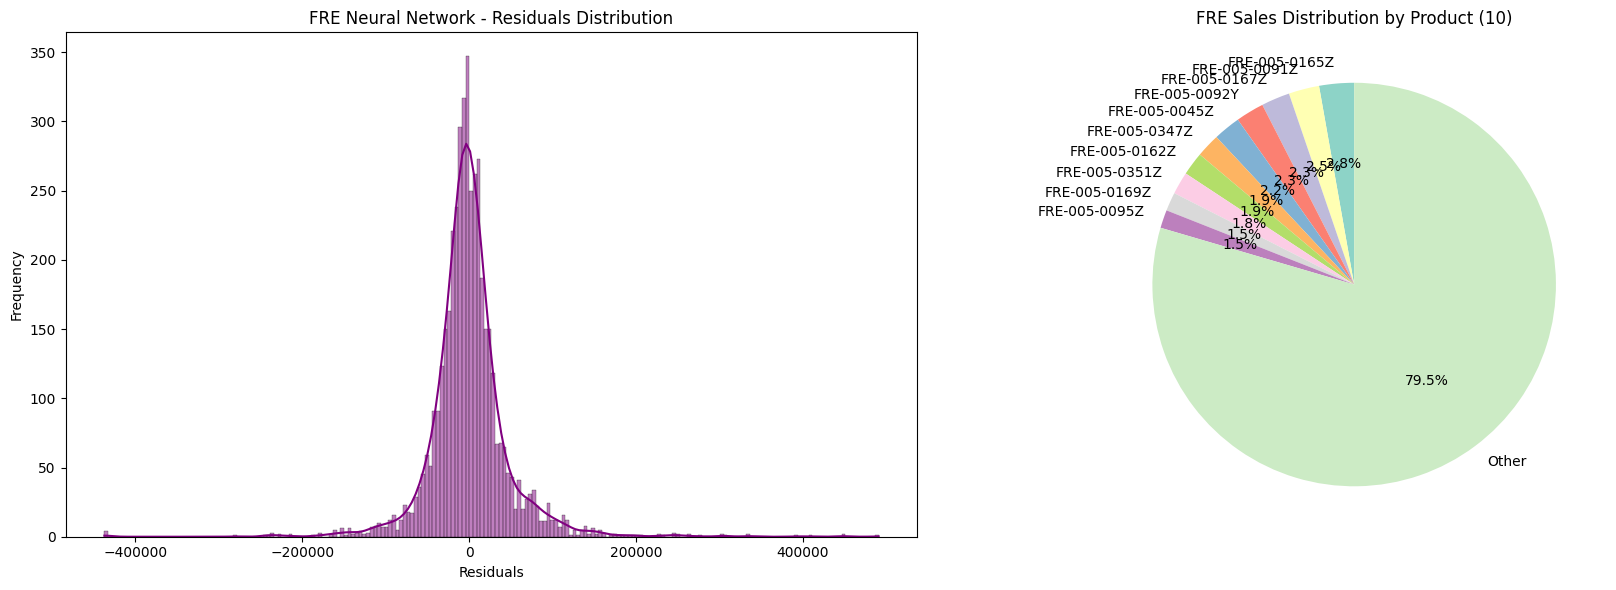

In [146]:
# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Histogram of Residuals
sns.histplot(residuals, kde=True, color='purple', ax=axes[0])
axes[0].set_title(f'{custom_ref} Neural Network - Residuals Distribution', fontsize=12)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Pie Chart of Product Order Quantity (Top {number} + Other)
product_sales = custom_code_df.groupby('ProductNumber')['OrderQuantity'].sum()  # Group by product and sum order quantities

# Get the top 20 products by sales
top_products = product_sales.nlargest(10)

# Group the remaining products as 'Other'
other_sales = product_sales.drop(top_products.index).sum()
top_products['Other'] = other_sales

# Plot the pie chart
top_products.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_products)))
axes[1].set_title(f'{custom_ref} Sales Distribution by Product ({len(top_products) - 1})', fontsize=12)
axes[1].set_ylabel('')  # Hide the y-label for the pie chart

plt.tight_layout()
plt.show()

In [147]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [148]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [149]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
6529,FRE-005-0084Z,2021,7,28,2,0,66.0,190000,250000.0,250000.0,...,146666.666667,192083.333333,186666.666667,0,0,0,NaN,NaN,5000,2021-07-01
6385,FRE-005-0084Z,2021,7,28,2,0,66.0,190000,250000.0,250000.0,...,146666.666667,192083.333333,186666.666667,0,0,0,NaN,NaN,5000,2021-07-01
7491,FRE-005-0090Z,2021,7,28,2,0,66.0,190000,20000.0,20000.0,...,179166.666667,152083.333333,120277.777778,0,0,0,NaN,NaN,0,2021-07-01
6421,FRE-005-0084Z,2021,7,28,2,0,66.0,190000,250000.0,250000.0,...,146666.666667,192083.333333,186666.666667,0,0,0,NaN,NaN,5000,2021-07-01
7427,FRE-005-0090Z,2021,7,28,2,0,66.0,190000,20000.0,20000.0,...,179166.666667,152083.333333,120277.777778,0,0,0,NaN,NaN,0,2021-07-01


In [150]:
# total_y_val.type

In [151]:
# total_y_val.type

In [152]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

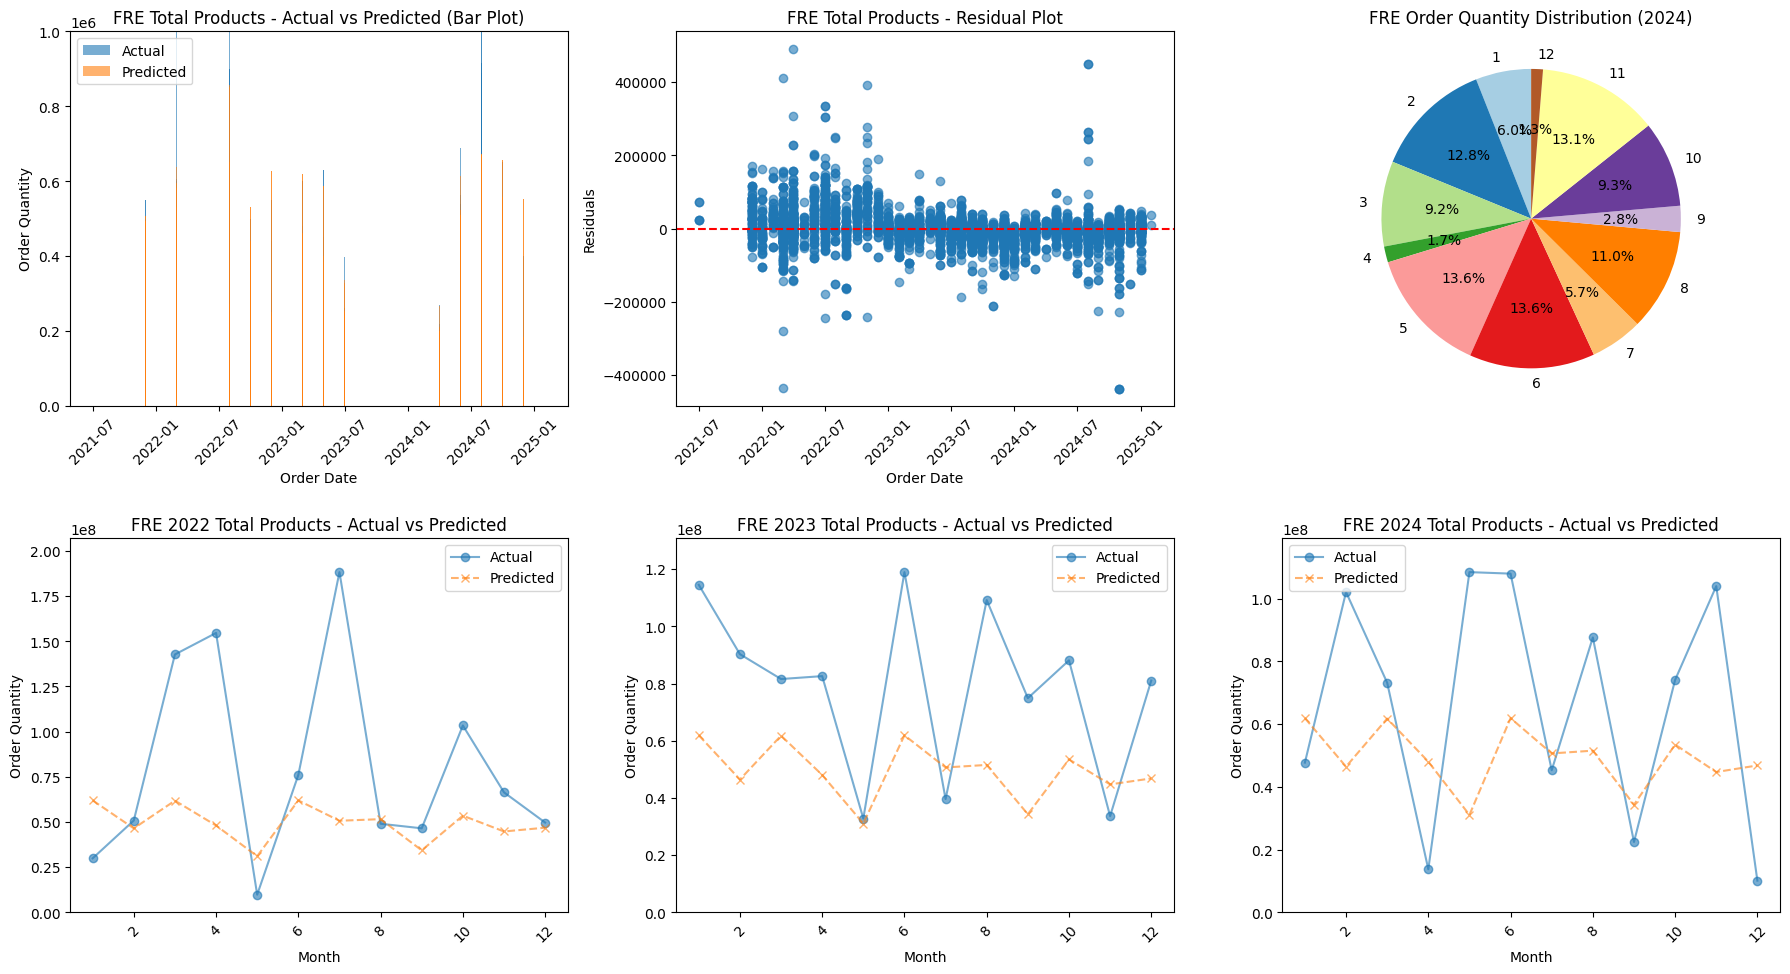

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suppose X_val is a DataFrame, y_val is a NumPy array
# y_val_pred is also a NumPy array of predictions from your NN

# y_val_series = pd.Series(y_val, index=X_val.index)
# y_val_pred_series = pd.Series(total_y_val_pred, index=X_val.index)

# 2) Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# 3) Bar plot: Actual vs. Predicted
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val, 
    label='Actual', 
    alpha=0.6
)
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val_pred, 
    label='Predicted', 
    alpha=0.6
)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 1_000_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 4) Residual Plot
residuals = total_y_val - total_y_val_pred
axes[0, 1].scatter(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    residuals, 
    alpha=0.6
)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# 5) Pie Chart: Order Quantity Distribution (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024] \
    .groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(
    order_2024,
    labels=order_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# 6) Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]
    if yearly_df.empty:
        continue

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_val_pred, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot
    axes[1, i].plot(
        monthly_actual.index,
        monthly_actual,
        label='Actual',
        alpha=0.6,
        marker='o',
        linestyle='-'
    )
    axes[1, i].plot(
        monthly_predicted.index,
        monthly_predicted,
        label='Predicted',
        alpha=0.6,
        marker='x',
        linestyle='--'
    )
    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
